"""<br>
@Author: Prayag Bhoir<br>
@Date: 03-10-2024<br>
@Last Modified by: Prayag Bhoir<br>
@Last Modified time: 03-10-2024<br>
@Title : Python programs on KNN Based on bank customer data, predicted whether cutomer will subscribe to term deposit or not.<br>
"""

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pylab as plt

<h2>Load the dataset </h2>

In [2]:
url = 'https://drive.google.com/uc?id=1E0EURgsF3L9Bt5hnOalE0d4Tw9mIOgTn'
df = pd.read_csv(url,delimiter=';',header=0)
#check the data
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [42]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


<h2>Preprocess the data</h2>

In [3]:
df['y'] = df['y'].map({'yes': 1, 'no': 0})

In [4]:
#check the data
df['y'].tail(10)

4511    1
4512    0
4513    0
4514    0
4515    0
4516    0
4517    0
4518    0
4519    0
4520    0
Name: y, dtype: int64

In [5]:
# Label encoding for 'education' as its ordinal
le = LabelEncoder()
df['education'] = le.fit_transform(df['education'])

In [6]:
# One-hot encoding for other categorical variables as its nominal
df_encoded = pd.get_dummies(df, columns=['job', 'marital', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome'], drop_first=True)

<h2>Check the outliers and correlation</h2>

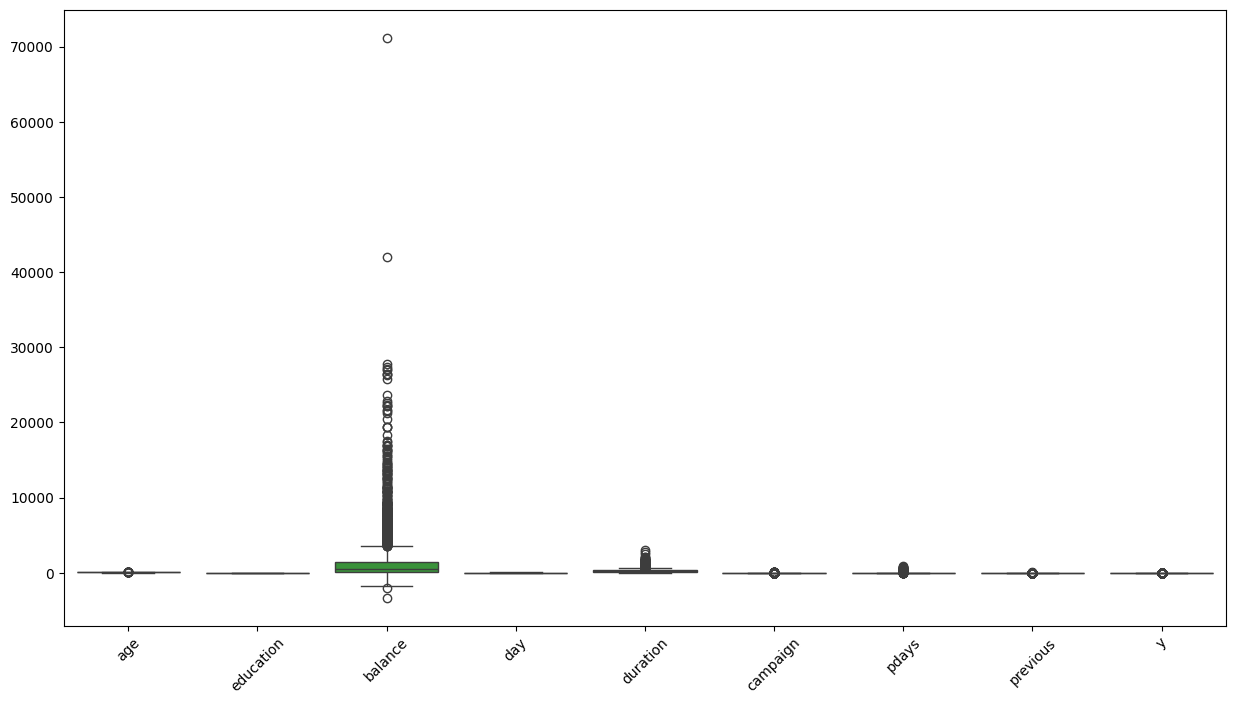

In [7]:
plt.figure(figsize=(15,8))
sns.boxplot(data=df)
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.show()

<h2>Observations</h2>
	<li>There are outliers present in the features</li>


<Axes: >

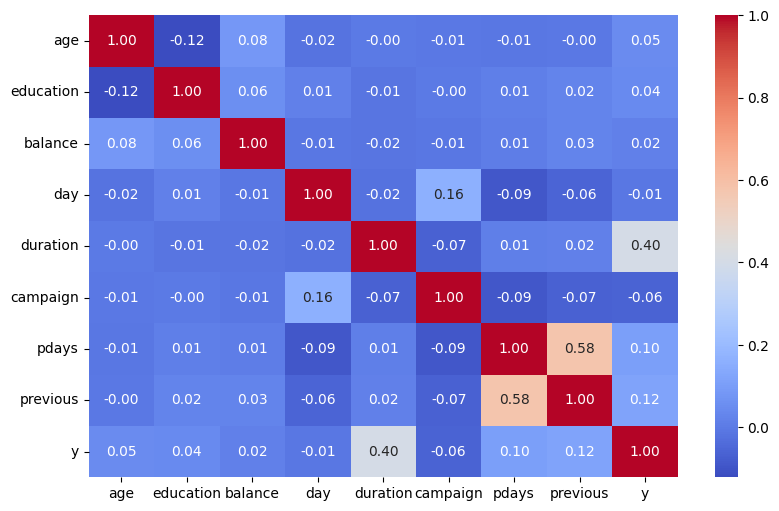

In [8]:
plt.figure(figsize=(9.5,6))
# For numerical value data
sns.heatmap(df[df.describe().columns].corr(), annot=True, fmt='.2f', cmap='coolwarm')

<h2>Observations</h2>
	<li>The orange and redesh shades has high correlation with the y</li>


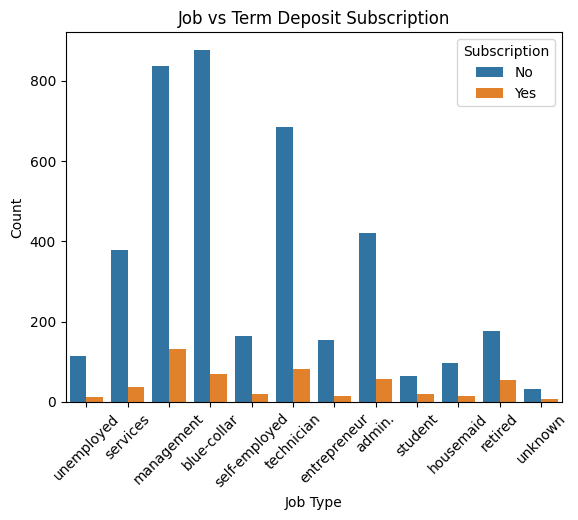

In [80]:
# Bar plot for 'job' vs 'y'
sns.countplot(data=df, x='job', hue='y')
plt.title('Job vs Term Deposit Subscription')
plt.xlabel('Job Type')
plt.ylabel('Count')
plt.legend(title='Subscription', labels=['No', 'Yes'])
plt.xticks(rotation=45)
plt.show()


<h2>Saperate the features</h2>


In [9]:
X = df_encoded.drop('y', axis=1)
y = df_encoded['y']
#Check the data
X.head(),y.head()

(   age  education  balance  day  duration  campaign  pdays  previous  \
 0   30          0     1787   19        79         1     -1         0   
 1   33          1     4789   11       220         1    339         4   
 2   35          2     1350   16       185         1    330         1   
 3   30          2     1476    3       199         4     -1         0   
 4   59          1        0    5       226         1     -1         0   
 
    job_blue-collar  job_entrepreneur  ...  month_jul  month_jun  month_mar  \
 0            False             False  ...      False      False      False   
 1            False             False  ...      False      False      False   
 2            False             False  ...      False      False      False   
 3            False             False  ...      False       True      False   
 4             True             False  ...      False      False      False   
 
    month_may  month_nov  month_oct  month_sep  poutcome_other  \
 0      False     

<h2>Split the dataset into training and testing</h2>


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
display(X_test)
display(y_test)

,age,education,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
2398,51,1,-2082,28,123,6,-1,0,False,True,...,True,False,False,False,False,False,False,False,False,True
800,50,2,2881,5,510,2,2,5,False,False,...,False,False,False,False,False,False,False,True,False,False
2288,50,1,1412,6,131,3,-1,0,False,False,...,False,False,False,False,False,False,False,False,False,True
2344,37,2,0,3,247,13,-1,0,False,False,...,False,True,False,False,False,False,False,False,False,True
3615,31,1,757,3,343,2,-1,0,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3589,38,3,3576,25,349,2,183,1,False,False,...,False,False,False,False,True,False,False,False,True,False
3128,57,0,195,30,185,4,-1,0,True,False,...,True,False,False,False,False,False,False,False,False,True
3259,52,1,428,30,153,1,-1,0,False,False,...,False,False,False,True,False,False,False,False,False,True
4239,31,1,2305,4,139,1,-1,0,False,False,...,False,False,False,False,False,False,False,False,False,True


2398    0
800     0
2288    0
2344    0
3615    0
       ..
3589    1
3128    0
3259    0
4239    0
2233    1
Name: y, Length: 905, dtype: int64

<h2>Build the model</h2>

In [20]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

KNeighborsClassifier()

<h2>Make prediction on test data.</h2>

In [21]:
y_pred = model.predict(X_test)

<h2>Evaluating the model</h2>

In [22]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [24]:
print(f"The accuracy is :{accuracy}\n{conf_matrix} \n{class_report}")

The accuracy is :0.8773480662983425
[[770  37]
 [ 74  24]] 
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       807
           1       0.39      0.24      0.30        98

    accuracy                           0.88       905
   macro avg       0.65      0.60      0.62       905
weighted avg       0.86      0.88      0.86       905



<h2>Check the prediction<h2>

In [25]:
# Convert predictions from 0/1 to 'no'/'yes'
predicted_labels = ['yes' if pred == 1 else 'no' for pred in y_pred]

# Create a DataFrame to show actual vs predicted
predictions_df = pd.DataFrame({'Actual': y_test.map({0: 'no', 1: 'yes'}), 'Predicted': predicted_labels})

# Display the last few predictions
print(predictions_df.head(30))


     Actual Predicted
2398     no        no
800      no        no
2288     no        no
2344     no        no
3615     no        no
3548     no        no
1115     no        no
4053     no        no
838      no        no
4141     no        no
1189     no        no
1461     no        no
3819    yes        no
3614     no       yes
179      no        no
4011     no        no
4237    yes        no
1321     no        no
4018     no        no
2174     no        no
3134     no        no
1878     no        no
1485    yes        no
3963     no        no
937      no        no
2401     no        no
1876    yes        no
415     yes       yes
1476     no        no
3471     no        no
